# Color Masking, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

Image dimensions: (450, 660, 3)


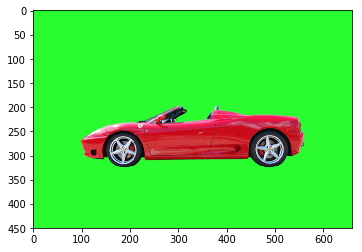

In [2]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)

# Display the image
plt.imshow(image)

### Define the color threshold

In [3]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])


### Create a mask

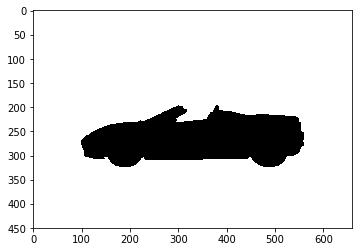

In [4]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

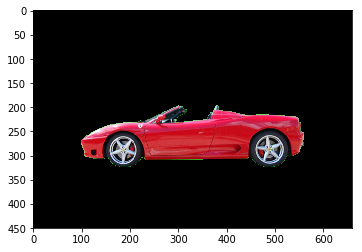

In [5]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


## TODO: Mask and add a background image

660 x 450


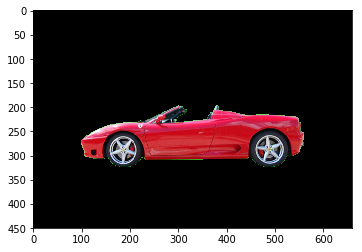

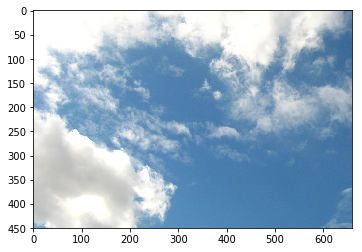

In [6]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')

## TODO: Crop it or resize the background to be the right size (450x660)
out_height = masked_image.shape[0]
out_width = masked_image.shape[1]

print("{} x {}".format(out_width, out_height))

scale_x = float(out_width) / background_image.shape[1]
scale_y = float(out_height) / background_image.shape[0]
scale = scale_x

if scale_x>1.0 or scale_y>1.0:
    scale = scale_x if scale_x>scale_y else scale_y
    
if scale>1.0:
    background_image = cv2.resize(background_image, background_image.shape*scale) 
    
background_image = background_image[0:out_height, 0:out_width]

## TODO: Mask the cropped background so that the pizza area is blocked
# Hint mask the opposite area of the previous image

## TODO: Display the background and make sure 
plt.imshow(masked_image)
plt.show()
plt.imshow(background_image)
plt.show()

### TODO:  Create a complete image

In [ ]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background

final_image = background_image.copy()
final_image[mask == 0] = [0, 0, 0]
final_image = final_image + masked_image

plt.imshow(final_image)
plt.show()